## Granulometry with morphology opening

- Wiki defines [Granulometry](https://en.wikipedia.org/wiki/Granulometry) as the measurement of the size distribution in a collection of grains, i.e., calculating the size of snow flakes.
- [this article](http://www.mathworks.com/help/images/examples/granulometry-of-snowflakes.html) from matlab examples talked about determining the size distribution ***without explicitly segmenting/detecting each object first***.
- Method: the whole idea is to use `morphology.open` as a sifting method so that we can profile the change of "remaining" parts of different bolbs, see below for details

In [1]:
%matplotlib inline

In [78]:
import matplotlib.pyplot as plt
from skimage import io, color, draw, measure, morphology, exposure, filters
import numpy as np

### Use morphology.open as sift

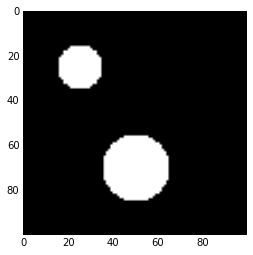

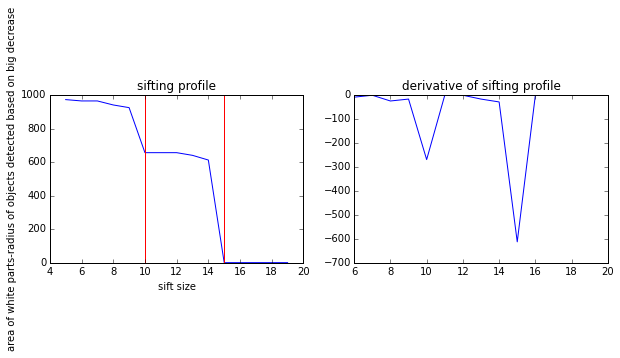

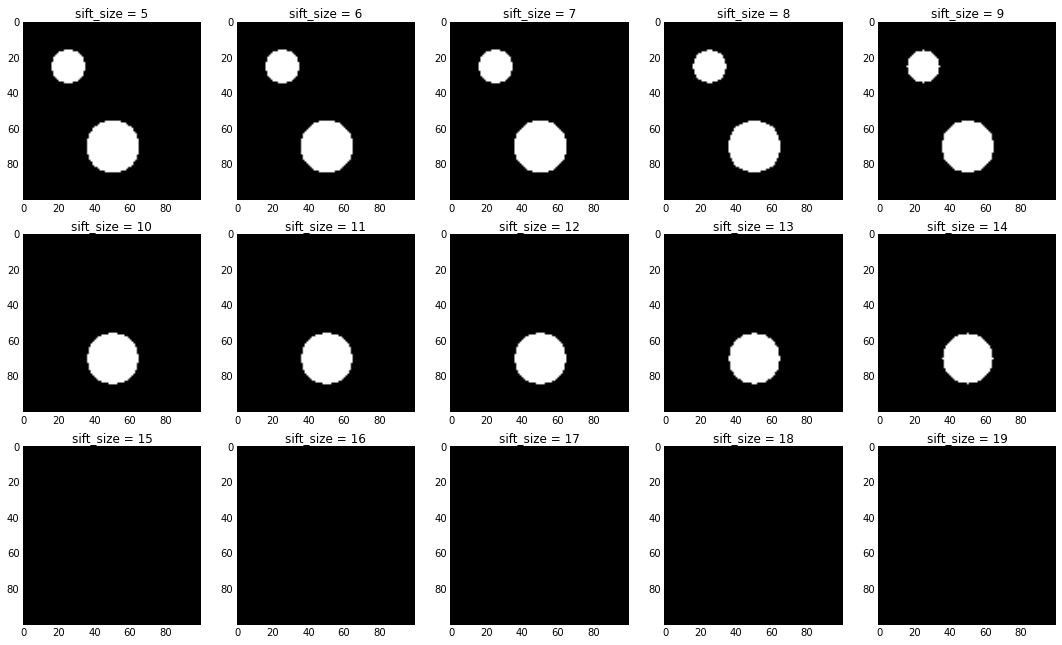

In [32]:
## two balls, (25, 25) with r = 10, (70, 50) with r = 15
canvas = np.zeros((100, 100), dtype = np.float)
r1, r2 = 10, 15
canvas[draw.circle(25, 25, r1)] = 1.
canvas[draw.circle(70, 50, r2)] = 1.
plt.imshow(canvas, cmap = plt.cm.gray)

## use morphology.open to build the "sifting profile"
sift_szs = np.arange(5, 20, 1)
white_areas = []
plot_imgs = []
for sz in sift_szs:
    plot_img = morphology.opening(canvas, selem = morphology.disk(sz))
    plot_imgs.append(plot_img)
    area = np.sum(plot_img.ravel())
    white_areas.append(area)

plt.figure(figsize = (10, 3))    
plt.subplot(1, 2, 1)
plt.plot(sift_szs, white_areas, "b-")
plt.title("sifting profile")
plt.xlabel("sift size")
plt.ylabel("area of white parts-radius of objects detected based on big decrease")
plt.axvline(x=r1, c="r", )
plt.axvline(x=r2, c="r", )

plt.subplot(1, 2, 2)
plt.plot(sift_szs[1:], np.diff(white_areas))
plt.title("derivative of sifting profile")

fig, axes = plt.subplots(3, 5, figsize = (15, 9))
fig.tight_layout()
axes = axes.ravel()
for im, ax, s in zip(plot_imgs, axes, sift_szs):
    ax.imshow(im, cmap = plt.cm.gray)
    ax.set_title("sift_size = %g" % s)

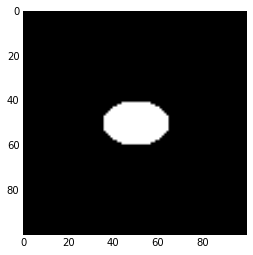

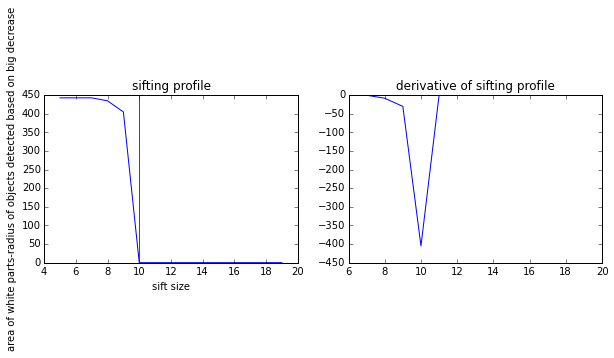

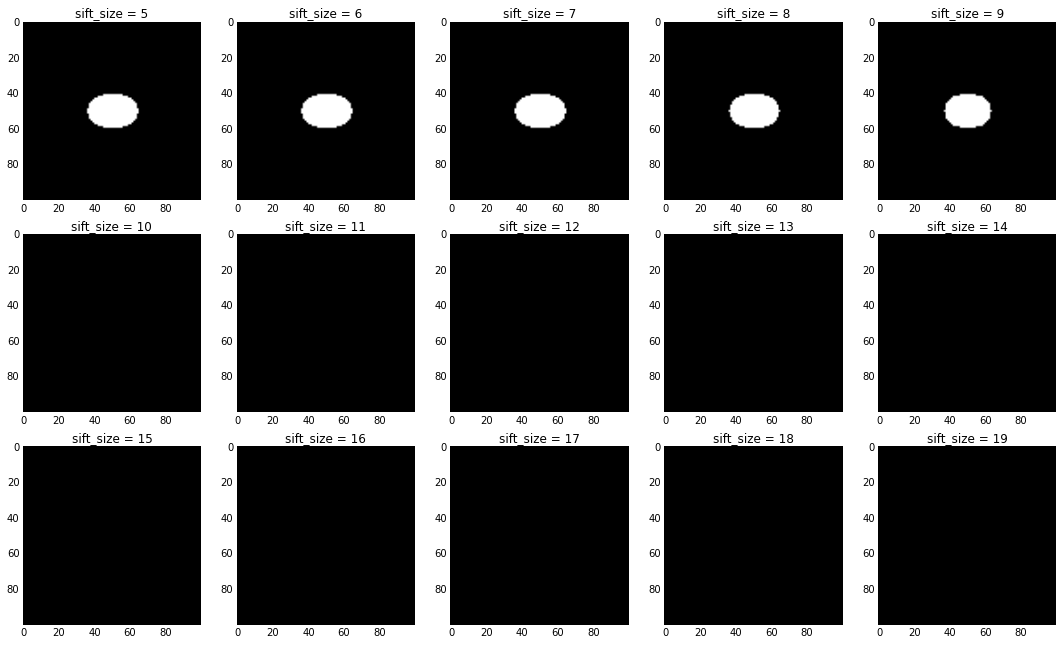

In [41]:
## how about irregular shape - it is the minimal axis size got detected
canvas = np.zeros((100, 100), dtype = np.float)


canvas[draw.ellipse(50, 50, 10, 15)] = 1.
plt.imshow(canvas, cmap = plt.cm.gray)

## use morphology.open to build the "sifting profile"
sift_szs = np.arange(5, 20, 1)
white_areas = []
plot_imgs = []
for sz in sift_szs:
    plot_img = morphology.opening(canvas, selem = morphology.disk(sz))
    plot_imgs.append(plot_img)
    area = np.sum(plot_img.ravel())
    white_areas.append(area)

plt.figure(figsize = (10, 3))    
plt.subplot(1, 2, 1)
plt.plot(sift_szs, white_areas, "b-")
plt.title("sifting profile")
plt.xlabel("sift size")
plt.ylabel("area of white parts-radius of objects detected based on big decrease")
plt.axvline(x=10, c="r", )


plt.subplot(1, 2, 2)
plt.plot(sift_szs[1:], np.diff(white_areas))
plt.title("derivative of sifting profile")

fig, axes = plt.subplots(3, 5, figsize = (15, 9))
fig.tight_layout()
axes = axes.ravel()
for im, ax, s in zip(plot_imgs, axes, sift_szs):
    ax.imshow(im, cmap = plt.cm.gray)
    ax.set_title("sift_size = %g" % s)

### Example from the original discussion

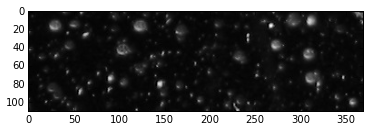

In [34]:
snow = io.imread("http://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/snowflakes.png", as_grey=True)
plt.imshow(snow, cmap = plt.cm.gray)

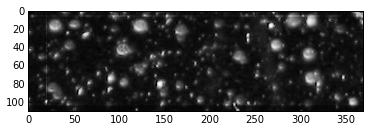

In [86]:
## contrast enhancement
enhanced = exposure.equalize_adapthist(snow, )
plt.imshow(enhanced, cmap = plt.cm.gray)

#enhanced = enhanced > filters.threshold_otsu(enhanced)

In [87]:
## you can use the binarized black white image, or just use the gray directly
sift_szs = np.arange(1, 15, 1)
remaining_areas = []
for sz in sift_szs:
    remain = morphology.opening(enhanced, selem = morphology.disk(sz))
    remaining_areas.append(remain.sum())

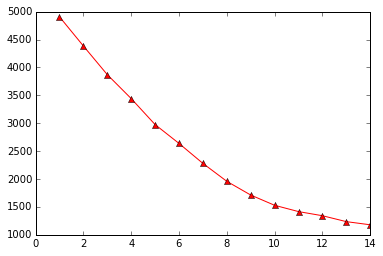

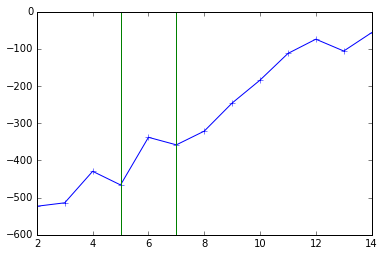

In [88]:
plt.plot(sift_szs, remaining_areas, "r-^")
plt.figure()
plt.plot(sift_szs[1:], np.diff(remaining_areas), "b-+")
plt.axvline(5, c="g")
plt.axvline(7, c="g")

so most bolb sizes are 5 or 7, next step is to find and show those blobs in the image

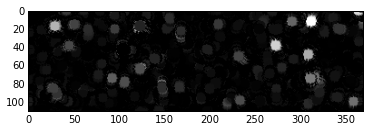

In [89]:
## e.g., show size = 5 blobs
open5 = morphology.opening(enhanced, selem = morphology.disk(5))
open6 = morphology.opening(enhanced, selem = morphology.disk(6))
plt.imshow(open5-open6, cmap = plt.cm.gray)

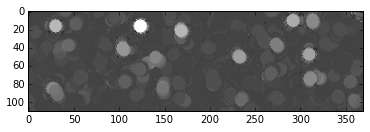

In [90]:
## e.g., show size = 7 blobs
open7 = morphology.opening(enhanced, selem = morphology.disk(7))
open8 = morphology.opening(enhanced, selem = morphology.disk(8))
plt.imshow(open7-open8, cmap = plt.cm.gray)